In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import os 
import PIL 

from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers.core import Dense,Dropout, Activation 
from skimage.transform import resize 
from sklearn.metrics import confusion_matrix

Load dữ liệu lên 

In [ ]:
DATASET_PATH = "/content/Datasets"

target_width = 28 
target_height = 28 
INVERT = False 

val_ratio = 0.2 
test_ratio = 0.2 

random.seed(42)

phân chia dữ liệu vào mảng 

In [ ]:
labels = []
y_all = []
x_all = []

for label in os.listdir(DATASET_PATH):
  class_dir = os.path.join(DATASET_PATH,label)
  if os.path.isdir(class_dir) and label != '.ipynb_checkpoints':
    labels.append(label)
    for i , file in enumerate(os.listdir(class_dir)):
      if file != ".ipynb_checkpoints":

        file_path = os.path.join(class_dir, file)
        img = PIL.Image.open(file_path).convert('L')

        image_array = np.asarray(img)
        
        # if INVERT:
        #   img_array = 255 - img_array
        
        x_all.append(image_array)

        y_all.append(label)
    print('Added',str(i+1),'image from',label)
num_sample = len(x_all)

labels = sorted(labels)

print(labels)
print('number of namples:',250)
         

Added 50 image from Background
Added 50 image from resistor
Added 50 image from Led
Added 50 image from Diode
Added 50 image from Capacitor
['Background', 'Capacitor', 'Diode', 'Led', 'resistor']
number of namples: 250


Mã hóa các nhãn 

In [ ]:
print('before:',y_all)
y_out = []

for i ,label in enumerate(y_all):
  y_out.append(labels.index(label))
y_all = y_out 
print('After:',y_all)

before: ['Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'Background', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 'resistor', 're

sáo chộn dữ liệu rồi chia dữ liệu thành train,val,test

In [ ]:
x_y = list(zip(x_all, y_all))
random.shuffle(x_y)
x_all, y_all = zip(*x_y)

num_sample_test = int(test_ratio * num_sample)
num_sample_val = int(val_ratio * num_sample)

x_test = x_all[:num_sample_test]
y_test = y_all[:num_sample_test]


x_val = x_all[num_sample_test:(num_sample_test+num_sample_val)]
y_val = y_all[num_sample_test:(num_sample_test+num_sample_val)]

x_train = x_all[(num_sample_test + num_sample_val):]
y_train = y_all[(num_sample_test + num_sample_val):]

num_sample_train = len(x_train)

print('Number of test sample:', num_sample_test)
print('Number of validation samples:', num_sample_val)
print('Number of training sample:',num_sample_train)

Number of test sample: 50
Number of validation samples: 50
Number of training sample: 150


load ảnh lên để xem thử 

Label: 3(Led)
[[157 157 159 ... 168 168 168]
 [157 157 159 ... 171 171 171]
 [157 157 159 ... 168 168 168]
 ...
 [110 110 110 ... 149 149 149]
 [110 110 110 ... 146 146 146]
 [107 110 110 ... 146 146 146]]


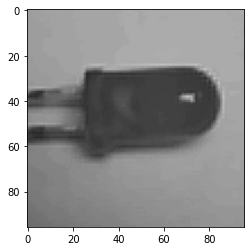

In [ ]:
idx  = 0
print("Label: "+ str(y_train[idx])+"("+labels[y_train[idx]]+")")
print(x_train[idx])

plt.imshow(x_train[idx],cmap='gray',vmin = 0, vmax = 255)

chỉnh lại kích cỡ ảnh

In [ ]:
def resize_image(images, width , height , anti_aliasing=True):
  X_out = []
  for i, img in enumerate(images):
    X_out.append(resize(img, (height, width), anti_aliasing=anti_aliasing))
  return X_out

In [ ]:
x_train = resize_image(x_train, target_width,target_height)

x_val = resize_image(x_val,target_width,target_height)

x_test = resize_image(x_test,target_width,target_height)

Label: 3(Led)
[[0.61568627 0.62158864 0.62667067 0.62745098 0.63137255 0.63277311
  0.63921569 0.63921569 0.63921569 0.63921569 0.64313725 0.64313725
  0.66022409 0.6627451  0.65406162 0.66244498 0.6627451  0.6627451
  0.6627451  0.6627451  0.6627451  0.6627451  0.6627451  0.6627451
  0.6627451  0.6627451  0.65882353 0.65882353]]


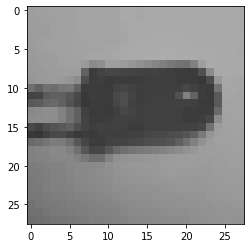

In [ ]:
idx  = 0 
print("Label: "+ str(y_train[idx])+"("+labels[y_train[idx]]+")")
print(x_train[idx][:1,:])

plt.imshow(x_train[idx],cmap='gray',vmin = 0, vmax = 1)

chia dữ liệu thành np array

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Validation set
X_val = np.array(x_val)
y_val = np.array(y_val)

X_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Test set
X_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# Print out the new Numpy array shapes (always a good idea to check the shapes!)
print("Training X:", x_train.shape)
print("Training y:", y_train.shape)
print("Validation X:", X_val.shape)
print("Validation y:", y_val.shape)
print("Test X:", X_test.shape)
print("Test y:", y_test.shape)

Training X: (150, 28, 28)
Training y: (150,)
Validation X: (50, 28, 28)
Validation y: (50,)
Test X: (50, 28, 28)
Test y: (50,)


duỗi ảnh

In [ ]:
len_vector = target_width * target_height

# Flatten matricies to vectors
x_train = x_train.reshape(num_sample_train, len_vector)
X_val = X_val.reshape(num_sample_val, len_vector)
X_test = X_test.reshape(num_sample_test, len_vector)

# Determine the input shape for our Keras model (must be tuple)
input_shape = (x_train.shape[1],)

# Print out shapes
print("X train:", x_train.shape)
print("y train:", y_train.shape)
print("X val:", X_val.shape)
print("y val:", y_val.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)
print("Input tensor shape:", input_shape)

X train: (150, 784)
y train: (150,)
X val: (50, 784)
y val: (50,)
X test: (50, 784)
y test: (50,)
Input tensor shape: (784,)


chuyển các nhãn thành one-hot vector

In [ ]:
# Get number of classes
num_classes = len(labels)

# Use Keras's np_utils to create one-hot encoding (note the capital 'Y' - 2D array)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_val = np_utils.to_categorical(y_val, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

# Print out shapes (capital 'Y' is our one-hot matrix!)
print("Y train:", Y_train.shape)
print("Y val:", Y_val.shape)
print("Y test:", Y_test.shape)

# Print out a few examples from training set
for i in range(10):
  print("Label: " + str(y_train[i]) + " | One-hot:", Y_train[i])

Y train: (150, 5)
Y val: (50, 5)
Y test: (50, 5)
Label: 3 | One-hot: [0. 0. 0. 1. 0.]
Label: 3 | One-hot: [0. 0. 0. 1. 0.]
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 1 | One-hot: [0. 1. 0. 0. 0.]
Label: 0 | One-hot: [1. 0. 0. 0. 0.]
Label: 3 | One-hot: [0. 0. 0. 1. 0.]
Label: 2 | One-hot: [0. 0. 1. 0. 0.]
Label: 3 | One-hot: [0. 0. 0. 1. 0.]
Label: 0 | One-hot: [1. 0. 0. 0. 0.]


tạo mô hình

In [ ]:
model = Sequential()

# First layer: fully-connected with relu activation
model.add(Dense(64, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Second layer: fully-connected with relu activation
model.add(Dense(64))   # Input shape is determined automatically from previous layer
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Third layer: 10 nodes, one for each class, and softmax activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Configure the model's training settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Print out model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                

Huấn luyện mô hình 

In [ ]:
history = model.fit(x_train, 
                    Y_train, 
                    batch_size=32, 
                    epochs=200, 
                    verbose=1,
                    validation_data=(X_val, Y_val))
#validation_data=(X_val, Y_val)

Epoch 1/200
5/5 [==============================] - 1s 51ms/step - loss: 1.6359 - acc: 0.2467 - val_loss: 1.5841 - val_acc: 0.2800
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 1.6504 - acc: 0.1933 - val_loss: 1.5491 - val_acc: 0.4200
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 1.5713 - acc: 0.3133 - val_loss: 1.5034 - val_acc: 0.5000
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 1.5372 - acc: 0.3133 - val_loss: 1.4716 - val_acc: 0.6400
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 1.5002 - acc: 0.3133 - val_loss: 1.4402 - val_acc: 0.6400
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 1.4851 - acc: 0.3733 - val_loss: 1.4178 - val_acc: 0.4400
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 1.4327 - acc: 0.4067 - val_loss: 1.3639 - val_acc: 0.5200
Epoch 8/200
5/5 [==============================] - 0s 10ms/step - loss: 1.4051 - acc: 0.440

vẽ biểu đồ kiểm tra mô hình

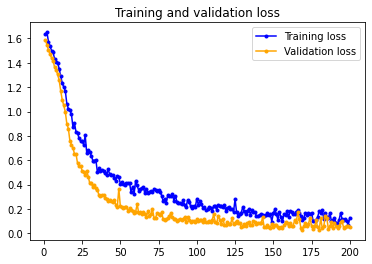

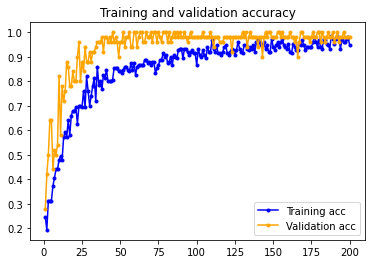

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a list of epoch numbers
epochs = range(1, len(acc) + 1)

# Plot training and validation loss values over time
plt.figure()
plt.plot(epochs, loss, color='blue', marker='.', label='Training loss')
plt.plot(epochs, val_loss, color='orange', marker='.', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Plot training and validation accuracies over time
plt.figure()
plt.plot(epochs, acc, color='blue', marker='.', label='Training acc')
plt.plot(epochs, val_acc, color='orange', marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()